In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import datetime


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
c_data = pd.read_json('/content/drive/MyDrive/CLV/raw_customer_data - Copy.json', lines=True)


In [4]:
c_data.head()

,id,transactions
0,128867,"[{'settledAt': '2022-03-10T14:14:34.583+0000',..."
1,128853,"[{'settledAt': '2022-03-10T11:30:45.292+0000',..."
2,128850,"[{'settledAt': '2022-03-10T11:06:32.510+0000',..."
3,128797,"[{'settledAt': '2022-03-10T08:40:27.015+0000',..."
4,128786,"[{'settledAt': '2022-03-09T17:22:12.586+0000',..."


In [5]:
# Check for missing values
if c_data.isnull().any().any():
    print("Input data contains missing values")
else:
    print("Input data does not contain missing values")

Input data does not contain missing values


In [57]:
# Print the column names
columnnames = c_data.columns
print(columnnames)

Index(['id', 'transactions'], dtype='object')


In [7]:
num_rows = c_data.shape[0]
print(num_rows)

6677


In [8]:
# Select the "transactions" value of the first row and print it
print(c_data.loc[0, 'transactions'])


[{'settledAt': '2022-03-10T14:14:34.583+0000', 'ftd': True, 'amount': 40.0, 'status': 'SUCCESS', 'type': 'deposit'}]


In [9]:
# Using c_data the original DataFrame converting the "transactions" column to a DataFrame
new_columns = ["id", "settledAt", "ftd", "amount", "status", "type"]
new_data = []

for index, row in c_data.iterrows():
    # extract information from the "transactions" column
    transactions = row["transactions"]
    for transaction in transactions:
        new_row = [row["id"], transaction["settledAt"], transaction["ftd"], 
                   transaction["amount"], transaction["status"], transaction["type"]]
        new_data.append(new_row)

# create the new DataFrame
trans_df = pd.DataFrame(new_data, columns=new_columns)


In [10]:
trans_df.head()

,id,settledAt,ftd,amount,status,type
0,128867,2022-03-10T14:14:34.583+0000,True,40.0,SUCCESS,deposit
1,128853,2022-03-10T11:30:45.292+0000,False,50.0,SUCCESS,deposit
2,128853,2022-03-10T09:55:57.469+0000,1.0,50.0,SUCCESS,deposit
3,128850,2022-03-10T11:06:32.510+0000,True,159.0,SUCCESS,deposit
4,128850,2022-03-10T11:32:38.318+0000,0.0,180.0,FAIL,deposit


In [11]:
num_rows = trans_df.shape[0]
print(num_rows)

180751


In [12]:
# Extract the transaction date and ftd flag from each transaction dictionary
trans_df['trans_date'] = pd.to_datetime(trans_df['settledAt']).dt.date
trans_df['ftd_flag'] = trans_df['ftd'].astype(bool)


In [58]:
# Sort the transactions DataFrame by id and transaction date
trans_df = trans_df.sort_values(['id', 'trans_date'])


In [14]:
# Group the transactions DataFrame by id and filter out all transactions that occurred before the first-time monetary transaction for each customer
trans_df['cum_ftd_flag'] = trans_df.groupby('id')['ftd_flag'].cumsum()
trans_df = trans_df[trans_df['cum_ftd_flag'] > 0]

In [15]:
# Print first 5 rows of DataFrame
print(trans_df.head())

          id                     settledAt    ftd  amount   status  \
180750  5774  2019-12-09T10:05:27.783+0000    1.0    50.0  SUCCESS   
180748  5774  2019-12-15T20:09:26.286+0000  False    50.0    ERROR   
180749  5774  2019-12-16T06:49:49.786+0000    0.0    50.0  SUCCESS   
180741  5825  2020-03-23T08:48:32.463+0000    1.0    20.0  SUCCESS   
180742  5825  2020-03-23T08:38:44.926+0000    0.0    20.0   CANCEL   

              type  trans_date  ftd_flag  cum_ftd_flag  
180750     deposit  2019-12-09      True             1  
180748  withdrawal  2019-12-15     False             1  
180749  withdrawal  2019-12-16     False             1  
180741     deposit  2020-03-23      True             1  
180742     deposit  2020-03-23     False             1  


In [16]:
num_rows = trans_df.shape[0]
print(num_rows)

174653


Explatory Data Analysis

In [17]:
#Checking for missing values
if trans_df.isnull().any().any():
    print("Transactions data contains missing values")
else:
    print("Transactions data does not contain missing values")


Transactions data does not contain missing values


In [18]:
#Checking for duplicated transactions
subset_columns = ["id", "settledAt", "ftd", "amount", "status"]
if trans_df.duplicated(subset=subset_columns).any():
    print("Transactions data contains duplicated transactions")
else:
    print("Transactions data does not contain duplicated transactions")


Transactions data contains duplicated transactions


In [19]:
#Confirming the duplicated transactions
mask = trans_df.duplicated(subset=["id", "settledAt", "ftd", "amount", "status"], keep=False)
duplicated_rows = trans_df[mask]
print(duplicated_rows)


            id                     settledAt   ftd  amount   status  \
13743   103756  2021-10-12T10:53:18.339+0000   1.0    70.0  SUCCESS   
13769   103756  2021-10-12T10:53:18.339+0000   1.0    70.0  SUCCESS   
13742   103756  2021-10-29T17:05:34.265+0000   0.0    20.0     FAIL   
13768   103756  2021-10-29T17:05:34.265+0000   0.0    20.0     FAIL   
13741   103756  2021-11-04T12:38:58.093+0000   0.0    15.0  SUCCESS   
...        ...                           ...   ...     ...      ...   
140894  128850  2022-03-10T11:32:38.318+0000   0.0   180.0     FAIL   
2       128853  2022-03-10T09:55:57.469+0000   1.0    50.0  SUCCESS   
140892  128853  2022-03-10T09:55:57.469+0000   1.0    50.0  SUCCESS   
0       128867  2022-03-10T14:14:34.583+0000  True    40.0  SUCCESS   
140890  128867  2022-03-10T14:14:34.583+0000  True    40.0  SUCCESS   

              type  trans_date  ftd_flag  cum_ftd_flag  
13743      deposit  2021-10-12      True             1  
13769      deposit  2021-10-12   

In [20]:
#Dropping the duplicates
subset_columns = ["id", "settledAt", "ftd", "amount", "status"]
trans_df.drop_duplicates(subset=subset_columns, inplace=True)


In [21]:
#Checking again for duplicated transactions
subset_columns = ["id", "settledAt", "ftd", "amount", "status"]
if trans_df.duplicated(subset=subset_columns).any():
    print("Transactions data contains duplicated transactions")
else:
    print("Transactions data does not contain duplicated transactions")


Transactions data does not contain duplicated transactions


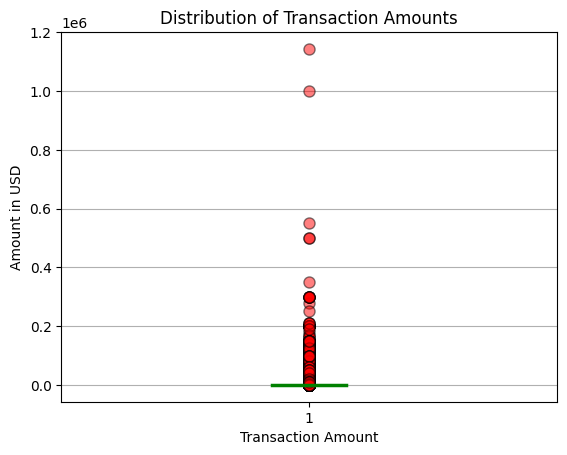

In [22]:
#Visualizing the distribution of transaction amounts
# Customizing the colors of the plot
boxprops = dict(linestyle='-', linewidth=2, color='blue')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='gray')
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, alpha=0.5)
meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='yellow', markersize=8)
medianprops = dict(linestyle='-', linewidth=2.5, color='green')

# Creating the box plot
plt.boxplot(trans_df['amount'], boxprops=boxprops, whiskerprops=whiskerprops, flierprops=flierprops,
            meanprops=meanprops, medianprops=medianprops)

# Adding labels and a title to the plot
plt.xlabel('Transaction Amount')
plt.ylabel('Amount in USD')
plt.title('Distribution of Transaction Amounts')

# Adding grid lines to the plot
plt.grid(axis='y')

# Displaying the plot
plt.show()


In [23]:
#Checking to verify the maximum amount of transaction
max_amount = trans_df['amount'].max()
max_amount_row = trans_df.loc[trans_df['amount'] == max_amount]
print('The row(s) with the maximum transaction amount:\n', max_amount_row)


The row(s) with the maximum transaction amount:
            id                     settledAt  ftd     amount  status     type  \
147198  14309  2022-03-10T10:59:00.323+0000  0.0  1144000.0  CANCEL  deposit   

        trans_date  ftd_flag  cum_ftd_flag  
147198  2022-03-10     False             1  


In [24]:
#Removing outliers of Amount
# number of rows to drop
n = 2 

# get the indices of the n largest values in the "amount" column
max_amount_indices = trans_df["amount"].nlargest(n).index

# drop the rows with the largest values
trans_df.drop(max_amount_indices, inplace=True)

In [25]:
# Verify that the maximum transaction amount has been dropped
max_amount = trans_df['amount'].max()
print('The new maximum transaction amount:', max_amount)

The new maximum transaction amount: 550000.0


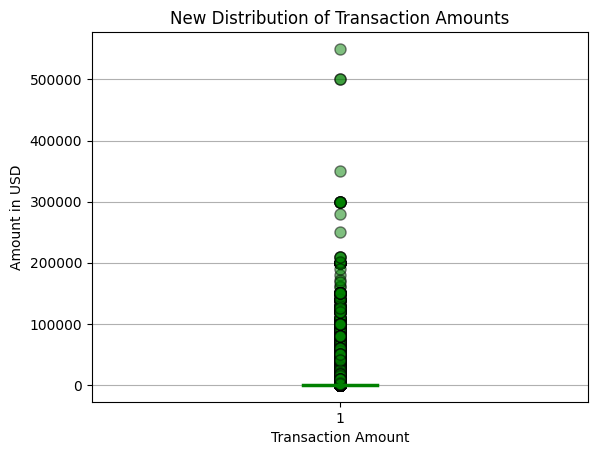

In [26]:
#Visualizing the New distribution of transaction amounts
# Customizing New the colors of the plot
boxprops = dict(linestyle='-', linewidth=2, color='blue')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='gray')
flierprops = dict(marker='o', markerfacecolor='green', markersize=8, alpha=0.5)
meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='yellow', markersize=8)
medianprops = dict(linestyle='-', linewidth=2.5, color='green')

# Creating the new box plot
plt.boxplot(trans_df['amount'], boxprops=boxprops, whiskerprops=whiskerprops, flierprops=flierprops,
            meanprops=meanprops, medianprops=medianprops)

# Adding labels and a title to the new plot
plt.xlabel('Transaction Amount')
plt.ylabel('Amount in USD')
plt.title('New Distribution of Transaction Amounts')

# Adding grid lines to the plot
plt.grid(axis='y')

# Displaying the plot
plt.show()


In [27]:
#confirm the data types of the columns are of the appropriate data types
trans_df['settledAt'] = pd.to_datetime(trans_df['settledAt'])
trans_df['trans_date'] = pd.to_datetime(trans_df['settledAt']).dt.date
trans_df['ftd'] = trans_df['ftd'].astype(bool)
trans_df['amount'] = trans_df['amount'].astype(int)


In [29]:
#Calculating the CLV for each customer
clv_df = trans_df.groupby('id').agg({'amount': 'sum'})
clv_df

,amount
id,
5774,150
5825,140
5830,200
5838,1684
5839,916
...,...
128786,160
128797,100
128850,339


In [33]:
#Merge the data
merged_df = pd.merge(trans_df, clv_df, on='id')
merged_df.head()

,id,settledAt,ftd,amount_x,status,type,trans_date,ftd_flag,cum_ftd_flag,amount_y
0,5774,2019-12-09 10:05:27.783000+00:00,True,50,SUCCESS,deposit,2019-12-09,True,1,150
1,5774,2019-12-15 20:09:26.286000+00:00,False,50,ERROR,withdrawal,2019-12-15,False,1,150
2,5774,2019-12-16 06:49:49.786000+00:00,False,50,SUCCESS,withdrawal,2019-12-16,False,1,150
3,5825,2020-03-23 08:48:32.463000+00:00,True,20,SUCCESS,deposit,2020-03-23,True,1,140
4,5825,2020-03-23 08:38:44.926000+00:00,False,20,CANCEL,deposit,2020-03-23,False,1,140


In [34]:
#Rename amount_y to CLV for each id
merged_df.rename(columns={"amount_y": "CLV"}, inplace=True)
merged_df.head()

,id,settledAt,ftd,amount_x,status,type,trans_date,ftd_flag,cum_ftd_flag,CLV
0,5774,2019-12-09 10:05:27.783000+00:00,True,50,SUCCESS,deposit,2019-12-09,True,1,150
1,5774,2019-12-15 20:09:26.286000+00:00,False,50,ERROR,withdrawal,2019-12-15,False,1,150
2,5774,2019-12-16 06:49:49.786000+00:00,False,50,SUCCESS,withdrawal,2019-12-16,False,1,150
3,5825,2020-03-23 08:48:32.463000+00:00,True,20,SUCCESS,deposit,2020-03-23,True,1,140
4,5825,2020-03-23 08:38:44.926000+00:00,False,20,CANCEL,deposit,2020-03-23,False,1,140


In [47]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value between amount_x and CLV
corr, p_value = pearsonr(merged_df['amount_x'], merged_df['CLV'])

# Print the correlation coefficient and p-value
print("Correlation coefficient: ", corr)
print("p-value: ", p_value)


Correlation coefficient:  0.31336063392295666
p-value:  0.0


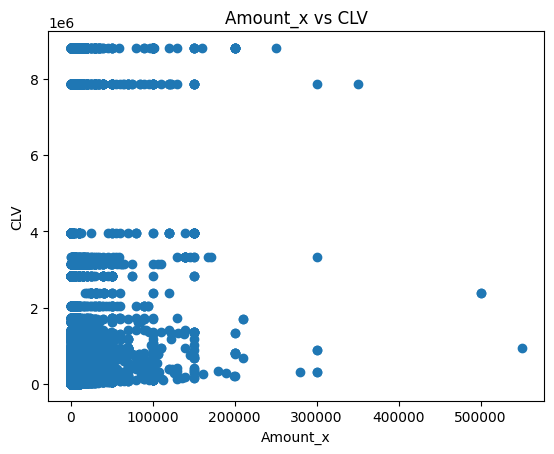

In [45]:
#Visualizing the results
# Plot a scatter plot of amount_x against CLV
plt.scatter(merged_df['amount_x'], merged_df['CLV'])

# Set the plot title and labels for the x and y axis
plt.title('Amount_x vs CLV')
plt.xlabel('Amount_x')
plt.ylabel('CLV')

# Show the plot
plt.show()


In [53]:
#checking relation between status and type variable
from scipy.stats import chi2_contingency
# Create a contingency table of status and type
cont_table = pd.crosstab(merged_df['status'], merged_df['type'])
print(cont_table)

# Calculate the chi-square statistic and p-value
chi2, p_value, dof, expected = chi2_contingency(cont_table)

# Print the chi-square statistic and p-value
print('Chi-square statistic:', chi2)
print('P-value:', p_value)


type     deposit  transfer  withdrawal
status                                
CANCEL     17887         0         350
ERROR        104       415        5955
FAIL       17786         0        6971
INITIAL        6         0           1
SUCCESS    52162      5883       67065
Chi-square statistic: 31504.279565713685
P-value: 0.0


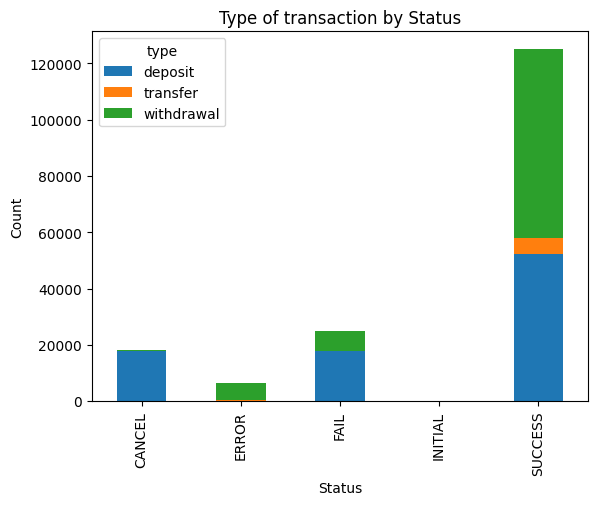

In [54]:
#Visualizing the results
# Create a stacked bar chart
cont_table.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Type of transaction by Status')

# Show the plot
plt.show()


Model